<h1><center><font size=10>Project 1 - Cardio Good Fitness</center></font></h1>
<h1><center>Nilesh Kulkarni</center></h1>

### Objective:




Explore the dataset to identify differences between the customers of each product. You can also explore relationships between the different attributes of the customers. You can approach it from any other line of questioning that you feel could be relevant for the business. The idea is to get you comfortable working in Python.

You are expected to do the following :

Come up with a customer profile (characteristics of a customer) of the different products

Perform univariate and multivariate analyses

Generate a set of insights and recommendations that will help the company in targeting new customers. 

<h1><b><font size=3>Data Dictionary</font></b></h1>

The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

Product - The model no. of the treadmill

Age -  Age of the customer in no of years

Gender - Gender of the customer

Education - Education of the customer in no. of years

Marital Status - Marital status of the customer

Usage - Avg. # times the customer wants to use the treadmill every week

Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)

Income - Income of the customer

Miles- Miles that a customer expects to run (in an year)

### 1. Importing required libraries & dataset

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import the dataset as-is and review first 5 rows

df=pd.read_csv('/content/drive/My Drive/AI-ML/Module1_Funda_AIML/PROJECT-1/CardioGoodFitness.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# Review last 5 rows to confirm that data is loaded correctly
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


### 2. Data Overview

In [ ]:
# Check shape of the data
print(" Rows:", df.shape[0], '\n', "Columns:" , df.shape[1])

 Rows: 180 
 Columns: 9


In [ ]:
# Check for duplicate rows

df.duplicated().sum()

0

**Check the data types of the columns for the dataset**

In [ ]:
# Check data types, missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Observation 1
* 180 rows and 9 columns in the dataset
* Duplication - No duplicate rows
* Completeness - No missing fields!
* Numerical Columns - 6 ( Age, Education, Usage, Fitness, Income, Miles)
* Categorical Columns - 3 (Product, Gender, MaritalStatus)
* No data type conversions needed at this point

In [ ]:
# Review stastical summary

df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.00,180,180.00,180,180.00,180.00,180.00,180.00
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.79,NaN,15.57,NaN,3.46,3.31,53719.58,103.19
std,NaN,6.94,NaN,1.62,NaN,1.08,0.96,16506.68,51.86
min,NaN,18.00,NaN,12.00,NaN,2.00,1.00,29562.00,21.00
25%,NaN,24.00,NaN,14.00,NaN,3.00,3.00,44058.75,66.00
50%,NaN,26.00,NaN,16.00,NaN,3.00,3.00,50596.50,94.00
75%,NaN,33.00,NaN,16.00,NaN,4.00,4.00,58668.00,114.75


**Let's check the count and percentage of values in in each categorical column**

In [ ]:
# Making a list of all categorical variables
cat_cols =  ['Product', 'Gender', 'MaritalStatus']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

TM195   0.44
TM498   0.33
TM798   0.22
Name: Product, dtype: float64
--------------------------------------------------
Male     0.58
Female   0.42
Name: Gender, dtype: float64
--------------------------------------------------
Partnered   0.59
Single      0.41
Name: MaritalStatus, dtype: float64
--------------------------------------------------


Observation 2
* `Product` - 3 distinct products. Most popular being TM195 (44% of Producs)
* `Age` - Ranges from 18 to 50, Average age is 28.79, median age is 26.
* `Gender` - Most users are male, 104 out of 180 (58%)
* `Education` - 75% of the users have 16 years or less.
* `MaritalStatus` - Most have the status as 'Partnered', 107 out of 180 (59%)
* `Usage` - On an average, users use the treadmill for over 3 days, some use it daily
* `Fitness` - Fitness ranges from 1 to 5 but 25% of the users consider themselves at least 4 out of 5 fit
* `Income` - Not much difference between mean and median income
* `Miles` - 75% of the users do <= 114 miles per year. Max value is 360, so some outliers exist

### 3. Univariate Data Analysis

Purpose of this analysis is find more details about individual feature and its characteristics

**Distribution for - Product**

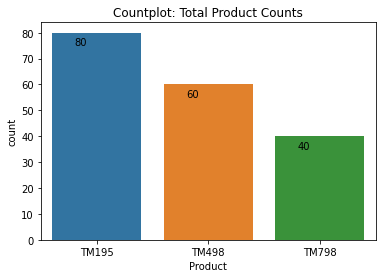

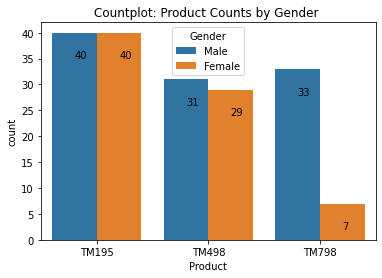

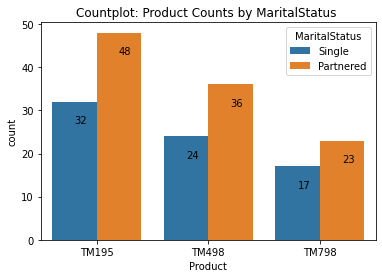

In [ ]:
# Use Countplot to see the distribution of Product

plt.title('Countplot: Total Product Counts')
plt.xlabel('Product')
ax = sns.countplot(data=df,x='Product');
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.title('Countplot: Product Counts by Gender ')
plt.xlabel('Product')
ax = sns.countplot(data=df,x='Product', hue='Gender');
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.title('Countplot: Product Counts by MaritalStatus ')
plt.xlabel('Product')
ax = sns.countplot(data=df,x='Product', hue='MaritalStatus');
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

Observation 3 - For Product
* TM195 - Seems to be most popular product 
* TM195 & TM498 - Used evenly by males and females
* TM798 - Males seem to have even preference for all treadmills, very few females seem to use TM798
* No specific observation of Product usage and MaritalStatus

**Distribution for - Age**

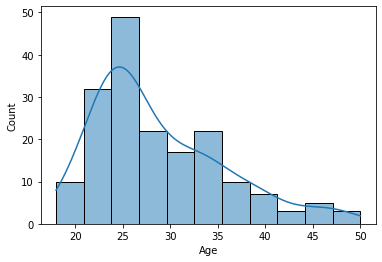

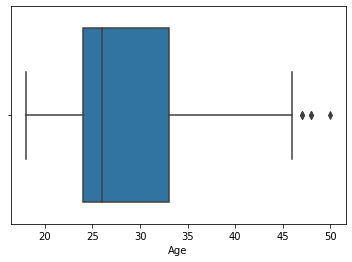

In [ ]:
# Use histplot and boxplot to see the distribution of Age

sns.histplot(data=df,x='Age', kde=True)
plt.show()

sns.boxplot(data=df,x='Age')
plt.show()

In [ ]:
# Check on upper outliers for Age

v = 'Age'
q1 = df[v].quantile(0.25)
q3 = df[v].quantile(0.75)
iqr=q3-q1

print('1st Quartile for' , v , 'is: ', q1)
print('3rd Quartile for' , v,  'is: ', q3)
print('IQR for' , v , 'is: ', iqr)

upper_whisker= q3 + (1.5 * iqr)
print('Upper Whisker for', v , 'is: ', upper_whisker)

df[df[v] > upper_whisker]

1st Quartile for Age is:  24.0
3rd Quartile for Age is:  33.0
IQR for Age is:  9.0
Upper Whisker for Age is:  46.5


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,TM195,47,Male,16,Partnered,4,3,56850,94
79,TM195,50,Female,16,Partnered,3,3,64809,66
139,TM498,48,Male,16,Partnered,2,3,57987,64
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


Observation 4 - For Age
* The distribution is skewed towards right.
* There are 5 upper outliers present in this feature. However, these are reasonable and certainly seem legit records. No outlier treatment needed.

**Distribution for - Gender**

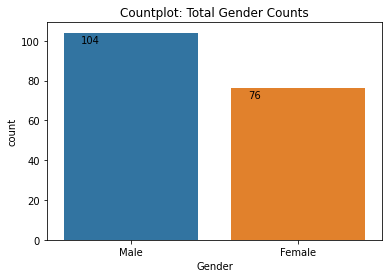

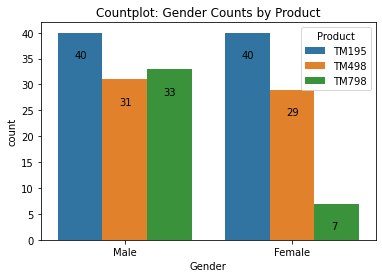

In [ ]:
# Use Countplot to see the distribution of Gender, a categorical variable

plt.title('Countplot: Total Gender Counts')
plt.xlabel('Product')
ax = sns.countplot(data=df,x='Gender');
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()-5))
plt.show()

plt.title('Countplot: Gender Counts by Product')
plt.xlabel('Product')
ax = sns.countplot(data=df,x='Gender', hue='Product');
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()-5))
plt.show()

Observation 5 - For Gender
* More male users than female users
* Males seem to use all 3 products evenly. But Females seem NOT to have preference for TM798

**Distribution for - Education**

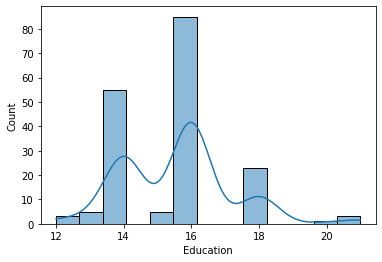

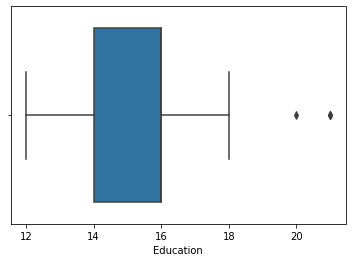

In [ ]:
# Use histplot and boxplot to see the distribution

sns.histplot(data=df,x='Education', kde=True)
plt.show()

sns.boxplot(data=df,x='Education')
plt.show()

In [ ]:
# Check on upper outliers for Education

v = 'Education'
q1 = df[v].quantile(0.25)
q3 = df[v].quantile(0.75)
iqr=q3-q1

print('1st Quartile for' , v , 'is: ', q1)
print('3rd Quartile for' , v,  'is: ', q3)
print('IQR for' , v , 'is: ', iqr)

upper_whisker= q3 + (1.5 * iqr)
print('Upper Whisker for', v , 'is: ', upper_whisker)

df[df[v] > upper_whisker]

1st Quartile for Education is:  14.0
3rd Quartile for Education is:  16.0
IQR for Education is:  2.0
Upper Whisker for Education is:  19.0


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,TM798,25,Male,20,Partnered,4,5,74701,170
157,TM798,26,Female,21,Single,4,3,69721,100
161,TM798,27,Male,21,Partnered,4,4,90886,100
175,TM798,40,Male,21,Single,6,5,83416,200


Observation 6 - For Education
* The distribution has multiple modes, 14 and 16 years of Education.
* There are 4 upper outliers present in this feature. However, these are reasonable and certainly seem legit records. No outlier treatment needed.


**Distribution for - MaritalStatus**

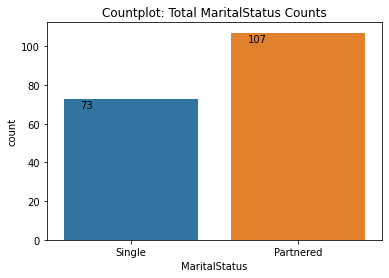

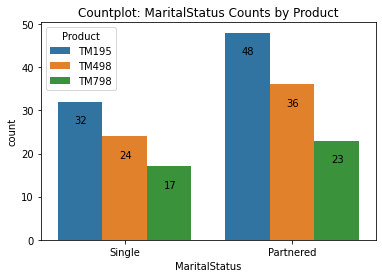

In [ ]:
# Use Countplot to see the distribution of MaritalStatus, a categorical variable

plt.title('Countplot: Total MaritalStatus Counts')
plt.xlabel('Product')
ax = sns.countplot(data=df,x='MaritalStatus');
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()-5))
plt.show()

plt.title('Countplot: MaritalStatus Counts by Product')
plt.xlabel('Product')
ax = sns.countplot(data=df,x='MaritalStatus', hue='Product');
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()-5))
plt.show()

Observation 7
* No specific observation worth noting


**Distribution for - Usage**


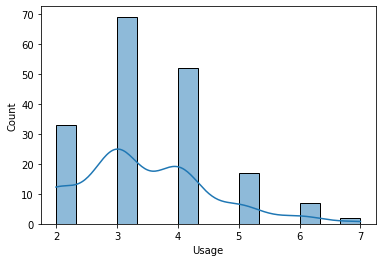

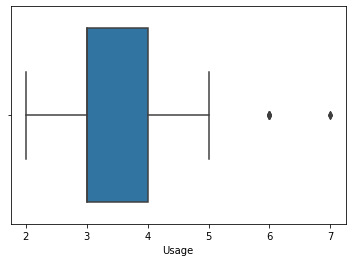

In [ ]:
# Use histplot and boxplot to see the distribution for Usage

sns.histplot(data=df,x='Usage', kde=True)
plt.show()

sns.boxplot(data=df,x='Usage')
plt.show()

In [ ]:
# Check on upper outliers for Usage

v = 'Usage'
q1 = df[v].quantile(0.25)
q3 = df[v].quantile(0.75)
iqr=q3-q1

print('1st Quartile for' , v , 'is: ', q1)
print('3rd Quartile for' , v,  'is: ', q3)
print('IQR for' , v , 'is: ', iqr)

upper_whisker= q3 + (1.5 * iqr)
print('Upper Whisker for', v , 'is: ', upper_whisker)

df[df[v] > upper_whisker]

1st Quartile for Usage is:  3.0
3rd Quartile for Usage is:  4.0
IQR for Usage is:  1.0
Upper Whisker for Usage is:  5.5


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
154,TM798,25,Male,18,Partnered,6,4,70966,180
155,TM798,25,Male,18,Partnered,6,5,75946,240
162,TM798,28,Female,18,Partnered,6,5,92131,180
163,TM798,28,Male,18,Partnered,7,5,77191,180
164,TM798,28,Male,18,Single,6,5,88396,150
166,TM798,29,Male,14,Partnered,7,5,85906,300
167,TM798,30,Female,16,Partnered,6,5,90886,280
170,TM798,31,Male,16,Partnered,6,5,89641,260
175,TM798,40,Male,21,Single,6,5,83416,200


Observation 8 - For Usage
* There are few upper outliers present in this feature. However, these are reasonable and certainly seem legit records. No outlier treatment needed.


**Distribution for - Fitness**

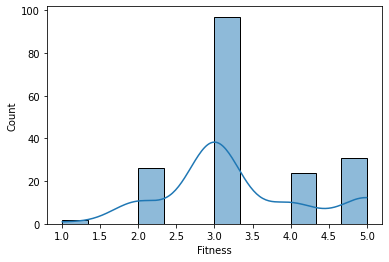

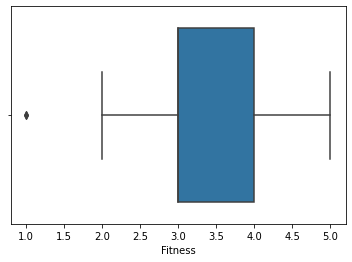

In [ ]:
# Use histplot and boxplot to see the distribution for Fitness

sns.histplot(data=df,x='Fitness', kde=True)
plt.show()

sns.boxplot(data=df,x='Fitness')
plt.show()

In [ ]:
# Check on lower outliers for Fitness

v = 'Fitness'
q1 = df[v].quantile(0.25)
q3 = df[v].quantile(0.75)
iqr=q3-q1

print('1st Quartile for' , v , 'is: ', q1)
print('3rd Quartile for' , v,  'is: ', q3)
print('IQR for' , v , 'is: ', iqr)

lower_whisker= q1 - (1.5 * iqr)
print('Lower Whisker for' , v , 'is: ', lower_whisker)

df[df[v] < lower_whisker]

1st Quartile for Fitness is:  3.0
3rd Quartile for Fitness is:  4.0
IQR for Fitness is:  1.0
Lower Whisker for Fitness is:  1.5


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
14,TM195,23,Male,16,Partnered,3,1,38658,47
117,TM498,31,Female,18,Single,2,1,65220,21


Observation 9 - For Fitness
* There are couple of lower outliers present in this feature. However, these are reasonable and certainly seem legit records. No outlier treatment needed.

**Distribution for - Income**

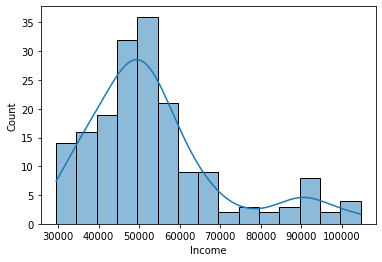

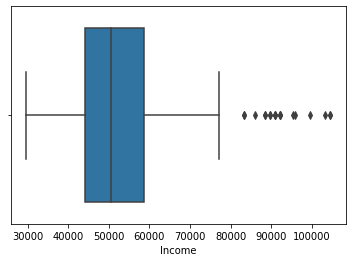

In [ ]:
# Use histplot and boxplot to see the distribution for Income

sns.histplot(data=df,x='Income', kde=True)
plt.show()

sns.boxplot(data=df,x='Income')
plt.show()

In [ ]:
# Check on upper outliers for Income

v = 'Income'
q1 = df[v].quantile(0.25)
q3 = df[v].quantile(0.75)
iqr=q3-q1

print('1st Quartile for' , v , 'is: ', q1)
print('3rd Quartile for' , v,  'is: ', q3)
print('IQR for' , v , 'is: ', iqr)

upper_whisker= q3 + (1.5 * iqr)
print('Upper Whisker for', v , 'is: ', upper_whisker)

df[df[v] > upper_whisker]

1st Quartile for Income is:  44058.75
3rd Quartile for Income is:  58668.0
IQR for Income is:  14609.25
Upper Whisker for Income is:  80581.875


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,TM798,27,Male,16,Partnered,4,5,83416,160
160,TM798,27,Male,18,Single,4,3,88396,100
161,TM798,27,Male,21,Partnered,4,4,90886,100
162,TM798,28,Female,18,Partnered,6,5,92131,180
164,TM798,28,Male,18,Single,6,5,88396,150
166,TM798,29,Male,14,Partnered,7,5,85906,300
167,TM798,30,Female,16,Partnered,6,5,90886,280
168,TM798,30,Male,18,Partnered,5,4,103336,160
169,TM798,30,Male,18,Partnered,5,5,99601,150
170,TM798,31,Male,16,Partnered,6,5,89641,260


Observation 10 - For Income
* There are several upper outliers present in this feature. However, these are reasonable and certainly seem legit records. No outlier treatment needed.

**Distribution for - Miles**

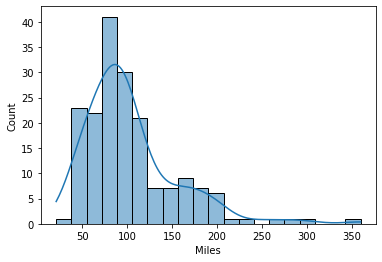

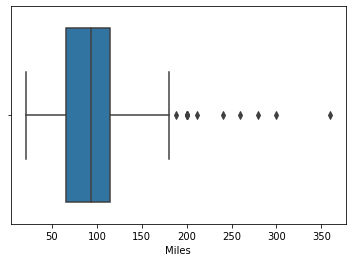

In [ ]:
# Use histplot and boxplot to see the distribution for Miles

sns.histplot(data=df,x='Miles', kde=True)
plt.show()

sns.boxplot(data=df,x='Miles')
plt.show()

In [ ]:
# Check on upper outliers for Miles

v = 'Miles'
q1 = df[v].quantile(0.25)
q3 = df[v].quantile(0.75)
iqr=q3-q1

print('1st Quartile for' , v , 'is: ', q1)
print('3rd Quartile for' , v,  'is: ', q3)
print('IQR for' , v , 'is: ', iqr)

upper_whisker= q3 + (1.5 * iqr)
print('Upper Whisker for', v , 'is: ', upper_whisker)

df[df[v] > upper_whisker]

1st Quartile for Miles is:  66.0
3rd Quartile for Miles is:  114.75
IQR for Miles is:  48.75
Upper Whisker for Miles is:  187.875


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,TM195,24,Female,16,Partnered,5,5,44343,188
84,TM498,21,Female,14,Partnered,5,4,34110,212
142,TM798,22,Male,18,Single,4,5,48556,200
148,TM798,24,Female,16,Single,5,5,52291,200
152,TM798,25,Female,18,Partnered,5,5,61006,200
155,TM798,25,Male,18,Partnered,6,5,75946,240
166,TM798,29,Male,14,Partnered,7,5,85906,300
167,TM798,30,Female,16,Partnered,6,5,90886,280
170,TM798,31,Male,16,Partnered,6,5,89641,260
171,TM798,33,Female,18,Partnered,4,5,95866,200


Observation 11 - For Miles
* Most number of users do about 85 miles per year
* There are several upper outliers present in this feature. However, these are reasonable and certainly seem legit records. No outlier treatment needed.

### 4. Multivariate Data Analysis

Purpose of this analysis is to identify inter relationships between multiple features

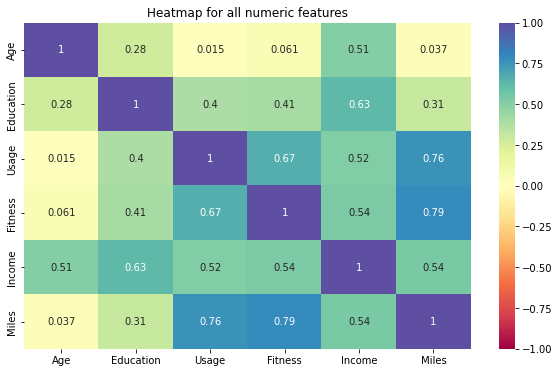

In [ ]:
#Let's start with Heatmap to check relationships between all numeric features

plt.figure(figsize=(10,6))
plt.title('Heatmap for all numeric features')
    
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

Observation 12 - Heatmap of all numeric features
* Strong positive corelation (>= 0.7) exists between below features - 

  a. Usage and Miles - This is expected, we will check it further

  b. Fitness and Miles - This is expected, we will check it further
* Several moderately positive corelation (between 0.3 and 0.7) exist between several features. However most are either intuitive (for example, Usage and Fitness) or not really relevant for our analysis (for example, Education and Usage)
* No negative corelations observed
  

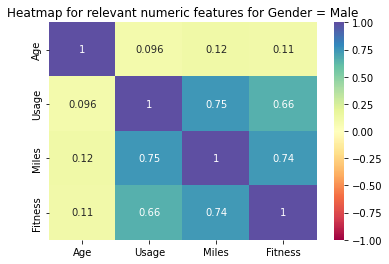

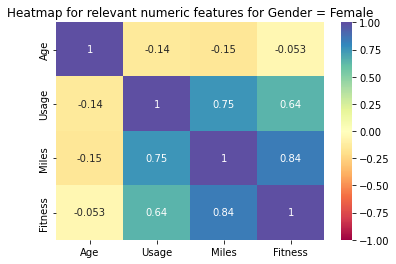

In [ ]:
# Let's check Heatmap for relevant numeric features, but for groups segregated by Gender

#Create separate new dataframes for Male and Female records

df_female=df[df['Gender'] == 'Female']
df_male=df[df['Gender'] == 'Male']

# Only some feature relationships are relevant for our analysis. Creating a list of them
heatmap_relevant_features=['Age','Usage','Miles','Fitness']

plt.title('Heatmap for relevant numeric features for Gender = Male')
sns.heatmap(df_male[heatmap_relevant_features].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

plt.title('Heatmap for relevant numeric features for Gender = Female')
sns.heatmap(df_female[heatmap_relevant_features].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

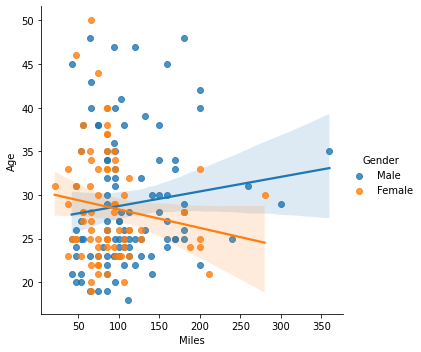

In [ ]:
sns.lmplot(data=df,x='Miles', y='Age', hue='Gender');

Observation 13 - Heatmap of relevant numeric features, grouped by Gender
* Both Males and Females show similar positive corelation between Usage and Miles as well as Fitness and Miles
* Some difference in the corelationships is observed. There is a positive corelation between Age and Miles for Males (although weak), whereas same corelation is negative for females.
* In the linear model plot, for Males - Miles go up with Age. For Females, Miles go down with Age

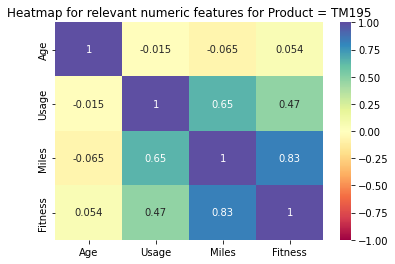

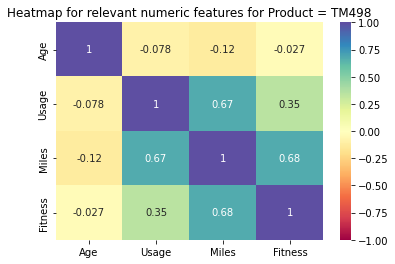

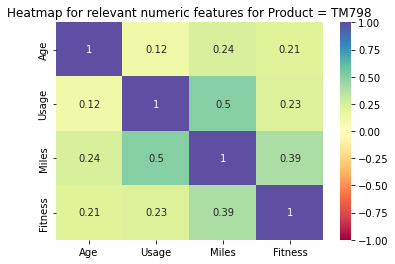

In [ ]:
# Let's check Heatmap for relevant numeric features, but for groups segregated by Product

#Create separate new dataframes for Product records

df_TM195=df[df['Product'] =='TM195']
df_TM498=df[df['Product'] =='TM498']
df_TM798=df[df['Product'] =='TM798']

plt.title('Heatmap for relevant numeric features for Product = TM195')
sns.heatmap(df_TM195[heatmap_relevant_features].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

plt.title('Heatmap for relevant numeric features for Product = TM498')
sns.heatmap(df_TM498[heatmap_relevant_features].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

plt.title('Heatmap for relevant numeric features for Product = TM798')
sns.heatmap(df_TM798[heatmap_relevant_features].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()



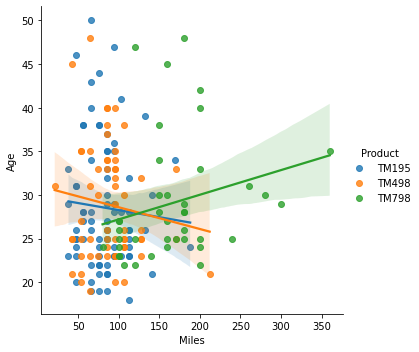

In [ ]:
# Create Scatterplot with linear model for Miles and Age

sns.lmplot(data=df,x='Miles', y='Age', hue='Product');


Observation 14
* Both Males and Females show similar positive corelation between Usage and Miles as well as Fitness and Miles
* Some difference in the corelationships is observed. There is a negative corelation between Age and Miles for TM195 & TM498 (although weak), whereas same corelation is moderately positive for TM798. As mentioned in Observation 13, Age and Miles have positive corelation only for Males. TM798 is mostly used by Males.

* Insight! - Based on the points above, may be TM798 is possibly a better product as Males with higher Age are able to use it to do more Miles with this treadmill. 

Let's check how Product use differs based on several features

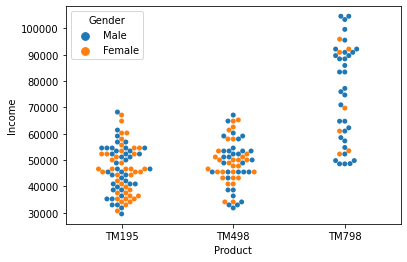

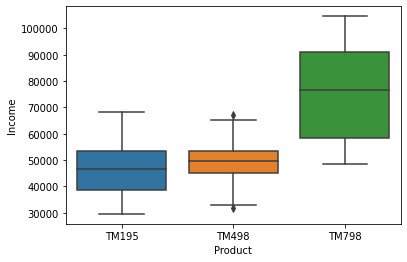

In [ ]:
# Create swarmplot for Product and Income. This is to check distribution of Income in users using all Products. 

sns.swarmplot(data=df, x='Product', y='Income', hue='Gender');
plt.show()

sns.boxplot(data=df, x='Product', y='Income')
plt.show()

In [ ]:
# Compare median, mean and 3rd quartile Income for each Product

print('Median Income for each Product are: \n' , df.groupby('Product')['Income'].quantile(0.5))
print('*'*50)
print('3rd Quartile Income for each Product are: \n' , df.groupby('Product')['Income'].quantile(0.75))
print('*'*50)
print('Average Income for each Product are: \n' , df.groupby('Product')['Income'].mean())

Median Income for each Product are: 
 Product
TM195   46617.00
TM498   49459.50
TM798   76568.50
Name: Income, dtype: float64
**************************************************
3rd Quartile Income for each Product are: 
 Product
TM195   53439.00
TM498   53439.00
TM798   90886.00
Name: Income, dtype: float64
**************************************************
Average Income for each Product are: 
 Product
TM195   46418.03
TM498   48973.65
TM798   75441.57
Name: Income, dtype: float64


Observation 15
* Overall, users with higher incomes use TM798. It is worth investigsting for particular reasons why higher Income users prefer TM798. 
* Income levels for TM195 ad TM498 users is comparable.

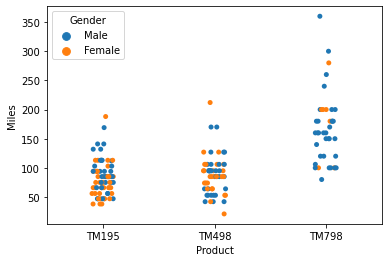

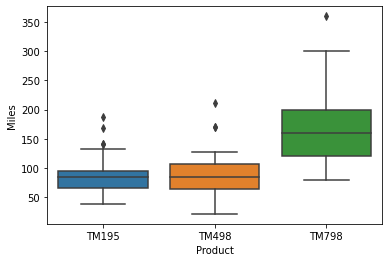

In [ ]:
# Create stripplot for Product and Miles. This is to check distribution of Miles in users using all Products. 

sns.stripplot(data=df, x='Product', y='Miles', hue='Gender');
plt.show()

sns.boxplot(data=df, x='Product', y='Miles')
plt.show()

In [ ]:
# Compare median, mean and 3rd quartile Miles for each Product

print('Median Miles for each Product are: \n' , df.groupby('Product')['Miles'].quantile(0.5))
print('*'*50)
print('3rd Quartile Miles for each Product are: \n' , df.groupby('Product')['Miles'].quantile(0.75))
print('*'*50)
print('Average Miles for each Product are: \n' , df.groupby('Product')['Miles'].mean())

Median Miles for each Product are: 
 Product
TM195    85.00
TM498    85.00
TM798   160.00
Name: Miles, dtype: float64
**************************************************
3rd Quartile Miles for each Product are: 
 Product
TM195    94.00
TM498   106.00
TM798   200.00
Name: Miles, dtype: float64
**************************************************
Average Miles for each Product are: 
 Product
TM195    82.79
TM498    87.93
TM798   166.90
Name: Miles, dtype: float64


Observation 16
* Overall users using TM798 are are able to do more Miles. Median Miles for TM798 is almost double tham the other two
* As TM798 is used more, most likely wear and tear and maintenance needs for this Product also will be more.
* Number of Miles done on other 2 tradmills are comparable.

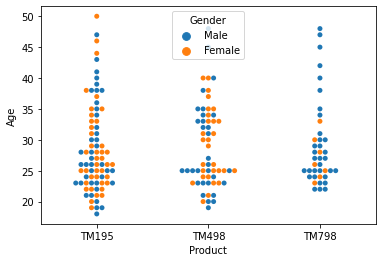

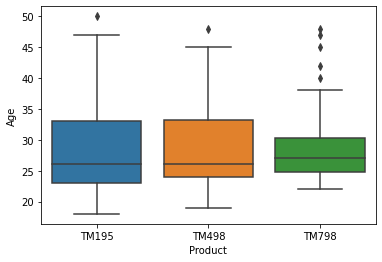

In [ ]:
# Create swarmplot for Product and Age. This is to check distribution of Age in users using all Products. 

sns.swarmplot(data=df, x='Product', y='Age', hue='Gender');
plt.show()

sns.boxplot(data=df, x='Product', y='Age')
plt.show()

In [ ]:
# Compare median, mean and 3rd quartile Age for each Product

print('Median Age for each Product are: \n' , df.groupby('Product')['Age'].quantile(0.5))
print('*'*50)
print('3rd Quartile Age for each Product are: \n' , df.groupby('Product')['Age'].quantile(0.75))
print('*'*50)
print('Average Age for each Product are: \n' , df.groupby('Product')['Age'].mean())


Median Age for each Product are: 
 Product
TM195   26.00
TM498   26.00
TM798   27.00
Name: Age, dtype: float64
**************************************************
3rd Quartile Age for each Product are: 
 Product
TM195   33.00
TM498   33.25
TM798   30.25
Name: Age, dtype: float64
**************************************************
Average Age for each Product are: 
 Product
TM195   28.55
TM498   28.90
TM798   29.10
Name: Age, dtype: float64


Observation 17
* Although average and median Age is slightly more, overall Users using TM798 are little younger than users for other two, 75% are younger that 30

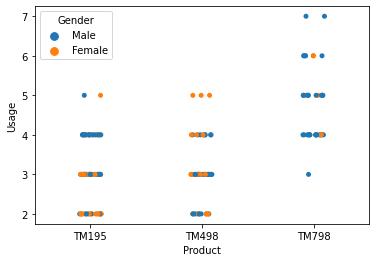

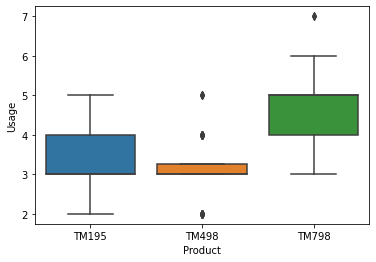

In [ ]:
# Create stripplot of Product and Usage. This is to check distribution of Usage in users using all Products. 

sns.stripplot(data=df, x='Product', y='Usage', hue='Gender');
plt.show()

sns.boxplot(data=df, x='Product', y='Usage')
plt.show()

In [ ]:
# Compare median, mean and 3rd quartile Usage for each Product

print('Median Usage for each Product are: \n' , df.groupby('Product')['Usage'].quantile(0.5))
print('*'*50)
print('3rd Quartile Usage for each Product are: \n' , df.groupby('Product')['Usage'].quantile(0.75))
print('*'*50)
print('Average Usage for each Product are: \n' , df.groupby('Product')['Usage'].mean())

Median Usage for each Product are: 
 Product
TM195   3.00
TM498   3.00
TM798   5.00
Name: Usage, dtype: float64
**************************************************
3rd Quartile Usage for each Product are: 
 Product
TM195   4.00
TM498   3.25
TM798   5.00
Name: Usage, dtype: float64
**************************************************
Average Usage for each Product are: 
 Product
TM195   3.09
TM498   3.07
TM798   4.78
Name: Usage, dtype: float64


Observation 18
* Looks like TM798 is used more as well. 75% of the users do more than 4 miles with TM798, whereas same number is 3 miles for TM195 and even lower for TM498

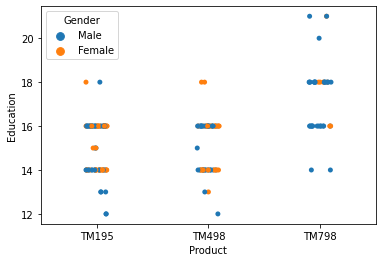

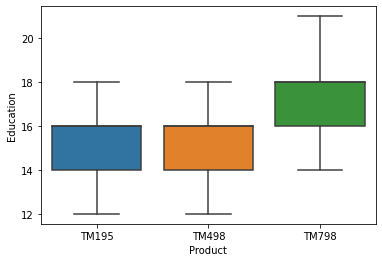

In [ ]:
# Create stripplot of Product and Education. This is to check distribution of Education in users using all Products. 

sns.stripplot(data=df, x='Product', y='Education', hue='Gender');
plt.show()

sns.boxplot(data=df, x='Product', y='Education')
plt.show()

In [ ]:
# Compare median, mean and 3rd quartile Education for each Product

print('Median Education for each Product are: \n' , df.groupby('Product')['Education'].quantile(0.25))
print('*'*50)
print('3rd Quartile Education for each Product are: \n' , df.groupby('Product')['Education'].quantile(0.75))
print('*'*50)
print('Average Education for each Product are: \n' , df.groupby('Product')['Education'].mean())

Median Education for each Product are: 
 Product
TM195   14.00
TM498   14.00
TM798   16.00
Name: Education, dtype: float64
**************************************************
3rd Quartile Education for each Product are: 
 Product
TM195   16.00
TM498   16.00
TM798   18.00
Name: Education, dtype: float64
**************************************************
Average Education for each Product are: 
 Product
TM195   15.04
TM498   15.12
TM798   17.32
Name: Education, dtype: float64


Observation 19
* TM798 users have more number of years of Education than other two products

### 5. Observations Summary

Dataset
1. While the dataset itself was small for EDA, quality of the data was good in terms of no duplications or missing data. There were no outliers that indicated data quality issues.

Univariate Analysis
2. Out of the 3 Products, TM195 is the most used Product, followed by TM498 then TM798.

3. While TM195 and TM498 are used evenly by Males and Females, TM798 is particularly preferred by Males. Very few Females use TM798.

4. There are more Male users than Female users in the dataset. 

5. The distribution for Education has multiple modes, 14 and 16 years of Education.

6. Most number of users do about 85 miles per year 

7. Outliers are present for few features like Age, Education, Usage, Fitness and Income. However, all seemed legit and reasonable, hence no outlier treatment was required.

Multivariate Analysis

8. Corelation between numeric customer features
  Strong positive corelation (>= 0.7) exists between below features - 
   i. Usage and Miles
   ii. Fitness and Miles
  Several moderately positive corelation (between 0.3 and 0.7) exist between several features. However most are either intuitive (for example, Usage and Fitness or Education and Income) or not really relevant for our analysis (for example, Education and Usage)
  No negative corelations observed

9. Both Males and Females show similar positive corelation between Usage and Miles as well as Fitness and Miles, which is obvious. 

10. There is a positive corelation between Age and Miles for Males (although weak), whereas same corelation is negative for females. In the linear model plot, for Males - Miles go up with Age. For Females, Miles go down with Age

11. There is a negative corelation between Age and Miles for TM195 & TM498 (although weak), whereas same corelation is moderately positive for TM798. As mentioned above, Age and Miles have positive corelation only for Males. TM798 is mostly used by Males.
Insight! - Based on the points above, may be TM798 is possibly a better product as Males with higher Age are able to use it to do more Miles with this treadmill. 

12. Overall, users with higher incomes use TM798. It is worth investigsting for particular reasons why higher Income users prefer TM798. Income levels for TM195 ad TM498 users are comparable and are lower than TM798.

13. Overall users using TM798 are are able to do more Miles. Number of Miles done on other 2 tradmills are comparable and are lesser than TM798. 75% of the users do more than 4 miles with TM798, whereas same number is 3 miles for TM195 and even lower for TM498. As TM798 is used more, most likely wear and tear and maintenance needs for this Product also will be more. 

14. Although average and median Age is slightly more, overall Users using TM798 are little younger than users for other two, 75% are younger that 30

15. No specific corelation between Product and MaritalStatus

### 6. Conclusions and Recommendations

<h1><b><font size=4>Customer Profile for TM195</font></b></h1>

  * Gender - Both Male and Female users

  * Income - Average Income above 46,000 USD

  * Age group - Majority of the users are between age 18 and 33 years

  * Education - Most have at least 16 years of Education

  * All Marital Status

<h1><b><font size=4>Customer Profile for TM498</font></b></h1>

  * Gender - Both Male and Female users
   
  * Income - Average Income above 49,000 USD

  * Age group - Majority of the users are between age 18 and 33 years

  * Education - Most have at least 16 years of Education

  * All Marital Status

<h1><b><font size=4>Customer Profile for TM798</font></b></h1>

  * Gender - Mostly Male users
   
  * Income - Average Income above 75,000 USD 

  * Age group - Majority of the users are between age 23 and 30 years

  * Education - Most have at least 18 years of Education

  * All Marital Status
  
  * Fitness conscious users, ardent users of treadmill

  

<h1><b><font size=4>Recommendations to the business</font></b></h1>

* Survey TM798 customers to identify product features that are appealing to them, features that enable and motivate them to use the treadmill more. It will be great if other products are incorporated with those product features.

* Based on insights from TM798 survey, communicate with Female customers to educate them about TM798 product features and how it will improve their usage and fitness.

* Based on insights about TM798, this possibly could be better quality and higher priced product (dataset does not have related data poits). If thats true, communicate with customers for other 2 products to educate them about TM798 product features and how it will improve their usage and fitness.

* TM798 is used by relatively higher income users. These are also the ones that are more fitness oriented. Combined this together, these could be potential customers for Up-Sale (Sell of higher priced or higher level product) or Cross-Sale (Sell other fitness product).

* TM798 is used more by its users. This may mean more wear and tear as well as maintenance requirements. These could be potential customers for selling maintenance services.

* There are users that use their respective products 7 days a week. These could be potential customers for Up-Sale and Cross-Sale.